In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense, Dropout, MaxPooling2D, Conv2D
from sklearn.metrics import confusion_matrix
import seaborn as sns

np.random.seed(0)

# **#Data**


In [ ]:
from keras.datasets import fashion_mnist
(x_train, y_train) , (x_test , y_test) = tf.keras.datasets.fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


# **# Visualize Examples of MNIST**

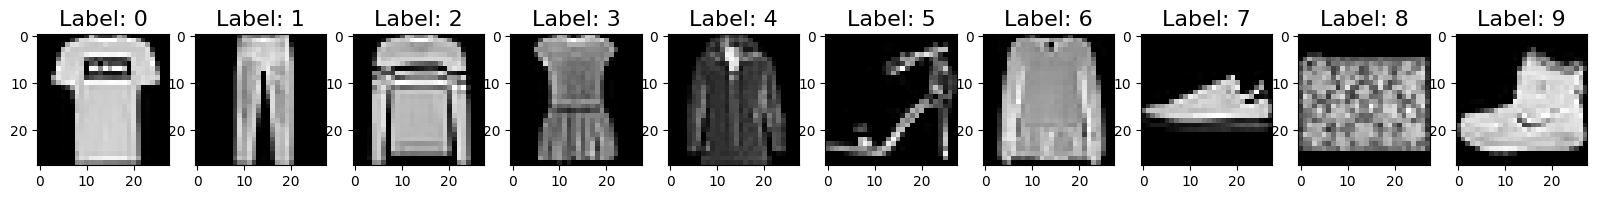

In [ ]:
num_classes = 10
f, ax= plt.subplots(1, num_classes, figsize=(20, 20))

for i in range(0, num_classes):
  sample = x_train[y_train == i][0]
  ax[i].imshow(sample, cmap='gray')
  ax[i].set_title("Label: {}".format(i), fontsize=16)

In [ ]:
for i in range(10):
  print(y_train[i])

9
0
0
3
0
2
7
2
5
5


In [ ]:
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [ ]:
for i in range(10):
  print(y_train[i])


[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


# **Prepare of Data**


# **MLP vs CNN . Plus added regularization**


In [ ]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.1)
])



In [ ]:
rescale_grayscale = tf.keras.Sequential([
    layers.Rescaling(1./255)
])

In [ ]:
modelMLP = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(28, 28, 1)),
    data_augmentation,
    rescale_grayscale,
    tf.keras.layers.Flatten(),
    Dense(units=256, activation='relu'),
    Dense(units=128, activation='relu'),
    Dense(units=64, activation='relu'),
    Dense(units=64, activation='relu'),
    Dropout(0.2),
    Dense(units=10, activation='softmax' )
])

modelMLP.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
modelMLP.summary()
# For the MLP I found out that 'data_augm...' and the rescale are making the MLP Model to Underfit
# Since the FashionMNIST data training set does not feature random rotation.
modelCNN = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(28,28,1)),
    layers.Rescaling(1./255),
    Conv2D(32, (3,3), activation='relu', padding='same'),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation='relu', padding='same'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(10, activation='softmax')
])

new_learning_rate = 0.001

optimizer = tf.keras.optimizers.Adam(learning_rate=new_learning_rate)

modelCNN.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
modelCNN.summary()


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_1 (Sequential)       │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 246,922 (964.54 KB)

 Trainable params: 246,922 (964.54 KB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_2 (Rescaling)         │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │       401,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 421,642 (1.61 MB)

 Trainable params: 421,642 (1.61 MB)

 Non-trainable params: 0 (0.00 B)

# **Train!**

In [ ]:
batch_size = 512
epochs=15
# I wanted to see the difference between the MLP model and the CNN model
# Especially for image recognition
# historyMLP = modelMLP.fit(x=x_train, y=y_train , batch_size=batch_size, epochs=epochs)

In [ ]:
batch_size = 64
epochs=30
history = modelCNN.fit(x=x_train, y=y_train , batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test))

Epoch 1/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 68s 71ms/step - accuracy: 0.0998 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 2/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 79s 67ms/step - accuracy: 0.0964 - loss: 2.3027 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 3/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 84s 70ms/step - accuracy: 0.0984 - loss: 2.3027 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 4/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 80s 68ms/step - accuracy: 0.1000 - loss: 2.3026 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 5/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 82s 67ms/step - accuracy: 0.0986 - loss: 2.3027 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 6/30
201/938 ━━━━━━━━━━━━━━━━━━━━ 47s 64ms/step - accuracy: 0.1008 - loss: 2.3026

KeyboardInterrupt: 

# **To Evaluate.**

[0.6236333250999451, 0.7596333622932434, 0.788349986076355, 0.8066499829292297, 0.8174833059310913, 0.8269333243370056, 0.8357666730880737, 0.8420666456222534, 0.8479166626930237, 0.8524166941642761, 0.8535166382789612, 0.8597999811172485, 0.8612499833106995, 0.8625500202178955, 0.8676499724388123, 0.8698833584785461, 0.8714166879653931, 0.874916672706604, 0.8768166899681091, 0.8781166672706604, 0.8804333209991455, 0.8828999996185303, 0.8848166465759277, 0.8870333433151245, 0.88714998960495, 0.8891000151634216, 0.8912333250045776, 0.8919333219528198, 0.8943166732788086, 0.8947666883468628]
[0.7429999709129333, 0.7928000092506409, 0.8015000224113464, 0.8136000037193298, 0.8220999836921692, 0.8392999768257141, 0.8489999771118164, 0.8472999930381775, 0.8483999967575073, 0.8598999977111816, 0.8615999817848206, 0.8651000261306763, 0.8669999837875366, 0.8664000034332275, 0.8694999814033508, 0.8715000152587891, 0.8769000172615051, 0.8758000135421753, 0.8781999945640564, 0.8791999816894531, 0.

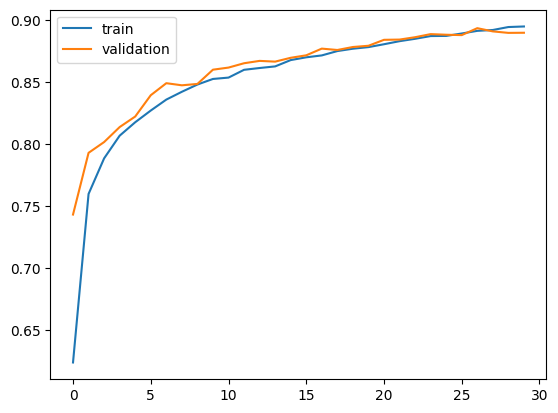

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.2307 - loss: 2.2987
Test Loss: 2.298750162124634, Test Accuracy: 0.23330000042915344


In [ ]:
print(history.history['accuracy'])
print(history.history['val_accuracy'])

plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='validation')
plt.legend()
plt.show()
test_loss, test_acc = modelCNN.evaluate(x_test, y_test)
print("Test Loss: {}, Test Accuracy: {}".format(test_loss, test_acc))


In [ ]:
y_pred = modelCNN.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
print(y_pred)
print(y_pred_classes)

In [ ]:
# Single Example
random_idx = np.random.choice(len(x_test))
x_sample = x_test[random_idx]
y_true = np.argmax(y_test, axis=1)
y_sample_true = y_true[random_idx]
y_sample_pred_class = y_pred_classes[random_idx]

plt.title("Predicted: {}, True; {}".format(y_sample_pred_class, y_sample_true), fontsize=16)
plt.imshow(x_sample.reshape(28, 28), cmap='gray')

# **Confusion Matrix**

In [ ]:
confusion_mtx = confusion_matrix(y_true, y_pred_classes)

# Plot
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(confusion_mtx, annot=True, fmt='d', ax=ax, cmap="Blues")
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
ax.set_title('Confusion Matrix');


# **To Investigate some errors**


In [ ]:
errors = (y_pred_classes - y_true != 0)
y_pred_classes_errors = y_pred_classes[errors]
y_pred_errors = y_pred[errors]
y_true_errors = y_true[errors]
x_test_errors = x_test[errors]

In [ ]:
y_pred_errors_probability = np.max(y_pred_errors, axis=1)
true_probability_errors = np.diagonal(np.take(y_pred_errors, y_true_errors, axis=1))
diff_errors_pred_true = y_pred_errors_probability - true_probability_errors
# Gets list of indices of sorted differences
sorted_idx_diff_errors = np.argsort(diff_errors_pred_true)
top_idx_diff_errors = sorted_idx_diff_errors[-5:] # Last 5 Ones


In [ ]:
# This shows the top errors
num = len(top_idx_diff_errors)
f, ax = plt.subplots(1, num, figsize=(30,30))

for i in range(0, num):
  idx = top_idx_diff_errors[i]
  sample = x_test_errors[idx].reshape(28,28)
  y_t = y_true_errors[idx]
  y_p = y_pred_classes_errors[idx]
  ax[i].imshow(sample, cmap='gray')
  ax[i].set_title("Predicted Label: {}\nTrue Label: {}".format(y_p, y_t), fontsize=22)